## Appendex
- Cick on the links:
    >1. <a href=#imports>Imports</a>
    >2. <a href=#loaddata>Load Data</a>
    >3. <a href=#dataformating>Data Formating</a>
    >4. <a href=#validat>Validate Assumption(Optional If exist)</a>
    >5. <a href=#Expl>Exploratory Data Analysis (Uni-Variable)</a>
    >6. <a href=#Explo>Exploratory Data Analysis (Multi-Variable_Relationship)</a>
    >7. <a href=#Ques> Questions & Insights </a>
    >8. <a href=#Conc> Conculsion </a>
    

## Abstract

Who doesn't like video games? Video games have become a favorite pastime for most of us. Video 
games are a billion-dollar business and have been for many years. Now imagine being able to analyze 
the sales trends for the popular Nintendo games and many more such platforms. How cool would it be!


## Design

Data provided in this project by Kaggle & data. world . In this module, we will be laying the foundation for our 
analysis by processing and exploring a large amount of data on video game sales. The dataset contains 
information regarding the sales of video games across various regions like North America, Europe, Japan 
and globally, while also giving information regarding the Names, Publishers and Platforms. This dataset 
has been made available thanks to Kaggle which is the home for many such datasets and competitions.


# <a name='imports' > Import Libraries </a>

In [76]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 



# <a name='loaddata' > Load Data </a>

In [77]:
df1 = pd.read_csv('VGglob.csv',na_values='tbd')

In [78]:
df1.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [79]:
df2 = pd.read_csv('vgsalesGlobale.csv',na_values='tbd')

In [80]:
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# <a name='dataformating' > Data Formating </a>

In [81]:
df1.drop('summary', axis=1, inplace=True)

In [82]:
df1.head()

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,98,7.7
3,SoulCalibur,Dreamcast,8-Sep-99,98,8.4
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,98,7.9


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18800 non-null  object 
 1   platform      18800 non-null  object 
 2   release_date  18800 non-null  object 
 3   meta_score    18800 non-null  int64  
 4   user_review   17435 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 734.5+ KB


In [84]:
df2.rename(columns = {'Name': 'name'}, inplace =True)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Merge Data 

In [86]:
df = pd.merge(df1, df2, on='name', how='inner')

In [87]:
df.head()

,name,platform,release_date,meta_score,user_review,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,95,N64,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,269,3DS,2011.0,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,226,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,1713,GBA,2001.0,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,2707,N64,2001.0,Sports,Activision,0.59,0.16,0.00,0.01,0.76


In [88]:
df.head(20)

,name,platform,release_date,meta_score,user_review,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,95,N64,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,269,3DS,2011.0,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,226,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,1713,GBA,2001.0,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,2707,N64,2001.0,Sports,Activision,0.59,0.16,0.00,0.01,0.76
5,Tony Hawk's Pro Skater 2,Dreamcast,6-Nov-00,97,6.2,226,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68
6,Tony Hawk's Pro Skater 2,Dreamcast,6-Nov-00,97,6.2,1713,GBA,2001.0,Sports,Activision,0.85,0.31,0.00,0.02,1.18
7,Tony Hawk's Pro Skater 2,Dreamcast,6-Nov-00,97,6.2,2707,N64,2001.0,Sports,Activision,0.59,0.16,0.00,0.01,0.76
8,Tony Hawk's Pro Skater 2,Game Boy Advance,30-May-01,95,6.9,226,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68
9,Tony Hawk's Pro Skater 2,Game Boy Advance,30-May-01,95,6.9,1713,GBA,2001.0,Sports,Activision,0.85,0.31,0.00,0.02,1.18


In [89]:
# Check null value 

In [90]:
df.isna().sum()

name               0
platform           0
release_date       0
meta_score         0
user_review     1079
Rank               0
Platform           0
Year             411
Genre              0
Publisher          9
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18607 entries, 0 to 18606
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18607 non-null  object 
 1   platform      18607 non-null  object 
 2   release_date  18607 non-null  object 
 3   meta_score    18607 non-null  int64  
 4   user_review   17528 non-null  float64
 5   Rank          18607 non-null  int64  
 6   Platform      18607 non-null  object 
 7   Year          18196 non-null  float64
 8   Genre         18607 non-null  object 
 9   Publisher     18598 non-null  object 
 10  NA_Sales      18607 non-null  float64
 11  EU_Sales      18607 non-null  float64
 12  JP_Sales      18607 non-null  float64
 13  Other_Sales   18607 non-null  float64
 14  Global_Sales  18607 non-null  float64
dtypes: float64(7), int64(2), object(6)
memory usage: 2.3+ MB


In [92]:
df.tail(20)

,name,platform,release_date,meta_score,user_review,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
18587,Aquaman: Battle for Atlantis,Xbox,30-Jul-03,26,2.6,16252,GC,2003.0,Action,TDK Mediactive,0.01,0.00,0.0,0.00,0.01
18588,Mucha Lucha! Mascaritas of the Lost Code,Game Boy Advance,18-Nov-03,26,3.9,11847,GBA,2003.0,Fighting,Ubisoft,0.05,0.02,0.0,0.00,0.07
18589,Stake: Fortune Fighters,Xbox,6-May-03,26,3.6,14941,XB,2003.0,Fighting,Metro 3D,0.02,0.01,0.0,0.00,0.02
18590,HBO Boxing,PlayStation,20-Nov-00,26,4.0,7393,PS,2000.0,Fighting,Acclaim Entertainment,0.12,0.08,0.0,0.01,0.21
18591,KISS Pinball,PlayStation,25-Apr-01,26,5.0,5748,PS,2001.0,Action,Take-Two Interactive,0.17,0.12,0.0,0.02,0.31
18592,Tenkai Knights: Brave Battle,3DS,7-Oct-14,26,2.9,15435,3DS,2014.0,Action,Namco Bandai Games,0.01,0.01,0.0,0.00,0.02
18593,Leisure Suit Larry: Box Office Bust,Xbox 360,31-Mar-09,25,2.5,8477,X360,2009.0,Adventure,Codemasters,0.14,0.01,0.0,0.01,0.16
18594,Leisure Suit Larry: Box Office Bust,Xbox 360,31-Mar-09,25,2.5,10469,PS3,2009.0,Adventure,Codemasters,0.06,0.03,0.0,0.01,0.10
18595,Leisure Suit Larry: Box Office Bust,PC,31-Mar-09,20,2.0,8477,X360,2009.0,Adventure,Codemasters,0.14,0.01,0.0,0.01,0.16
18596,Leisure Suit Larry: Box Office Bust,PC,31-Mar-09,20,2.0,10469,PS3,2009.0,Adventure,Codemasters,0.06,0.03,0.0,0.01,0.10


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18607 entries, 0 to 18606
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18607 non-null  object 
 1   platform      18607 non-null  object 
 2   release_date  18607 non-null  object 
 3   meta_score    18607 non-null  int64  
 4   user_review   17528 non-null  float64
 5   Rank          18607 non-null  int64  
 6   Platform      18607 non-null  object 
 7   Year          18196 non-null  float64
 8   Genre         18607 non-null  object 
 9   Publisher     18598 non-null  object 
 10  NA_Sales      18607 non-null  float64
 11  EU_Sales      18607 non-null  float64
 12  JP_Sales      18607 non-null  float64
 13  Other_Sales   18607 non-null  float64
 14  Global_Sales  18607 non-null  float64
dtypes: float64(7), int64(2), object(6)
memory usage: 2.3+ MB


In [94]:
# Conver year to int

In [95]:
df["Year"]=df["Year"].fillna(0).astype(np.int64)

In [96]:
df.head()

,name,platform,release_date,meta_score,user_review,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,95,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,99,9.1,269,3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,226,PS,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,1713,GBA,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,98,7.4,2707,N64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76


In [97]:
#df ['Year']= df.to_string()

In [98]:
df["Year"].max()

2016

In [99]:
df = df.dropna()

In [100]:
df.isna().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17519 entries, 0 to 18606
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          17519 non-null  object 
 1   platform      17519 non-null  object 
 2   release_date  17519 non-null  object 
 3   meta_score    17519 non-null  int64  
 4   user_review   17519 non-null  float64
 5   Rank          17519 non-null  int64  
 6   Platform      17519 non-null  object 
 7   Year          17519 non-null  int64  
 8   Genre         17519 non-null  object 
 9   Publisher     17519 non-null  object 
 10  NA_Sales      17519 non-null  float64
 11  EU_Sales      17519 non-null  float64
 12  JP_Sales      17519 non-null  float64
 13  Other_Sales   17519 non-null  float64
 14  Global_Sales  17519 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 2.1+ MB


## <a name='Expl' > Exploratory Data Analysis (Uni-Variable) </a>

<AxesSubplot:>

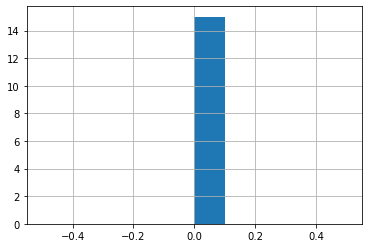

In [102]:
# To check null value 
(df.isna().sum() / len(df) * 100.00).hist()

In [103]:
# Discover outliers with Quartile calculations (IQR)

In [104]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


meta_score        17.00
user_review        1.60
Rank            7133.50
Year               7.00
NA_Sales           0.35
EU_Sales           0.21
JP_Sales           0.01
Other_Sales        0.07
Global_Sales       0.69
dtype: float64


In [105]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,EU_Sales,Genre,Global_Sales,JP_Sales,NA_Sales,Other_Sales,Platform,Publisher,Rank,Year,meta_score,name,platform,release_date,user_review
0,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False
2,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18602,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
18603,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
18604,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
18605,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


<AxesSubplot:xlabel='NA_Sales'>

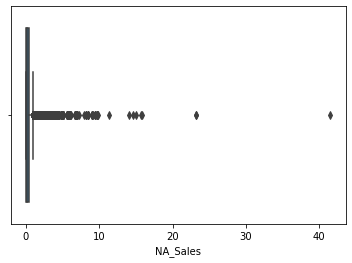

In [106]:
sns.boxplot(df['NA_Sales'])

<AxesSubplot:xlabel='EU_Sales'>

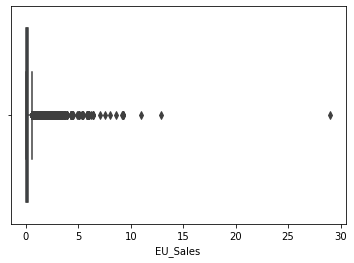

In [107]:
sns.boxplot(df['EU_Sales'])

<AxesSubplot:xlabel='JP_Sales'>

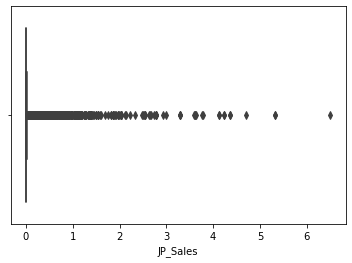

In [108]:
sns.boxplot(df['JP_Sales'])

<AxesSubplot:xlabel='Year'>

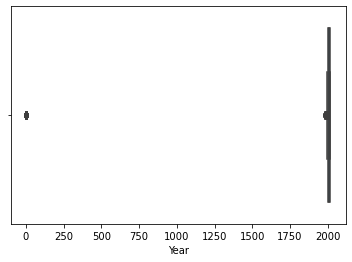

In [109]:
sns.boxplot(df['Year'])

<AxesSubplot:xlabel='Global_Sales'>

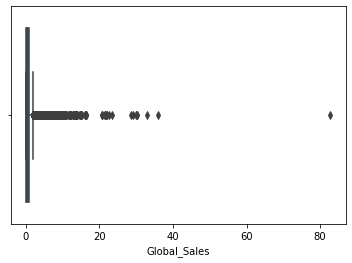

In [110]:
sns.boxplot(df['Global_Sales'])

## <a name='Explo' > Exploratory Data Analysis (Multi-Variable_Relationship) </a>

In [136]:
# correlation between user_review and Global_Sales
print(df['user_review'].corr(df['Global_Sales']))

0.06172124455719201


In [135]:
#sns.pairplot(df)

<AxesSubplot:xlabel='user_review'>

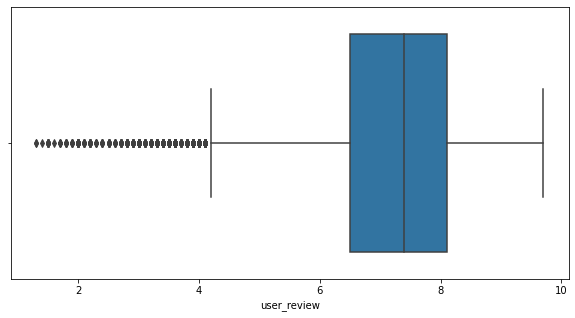

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(x='user_review', data= df)

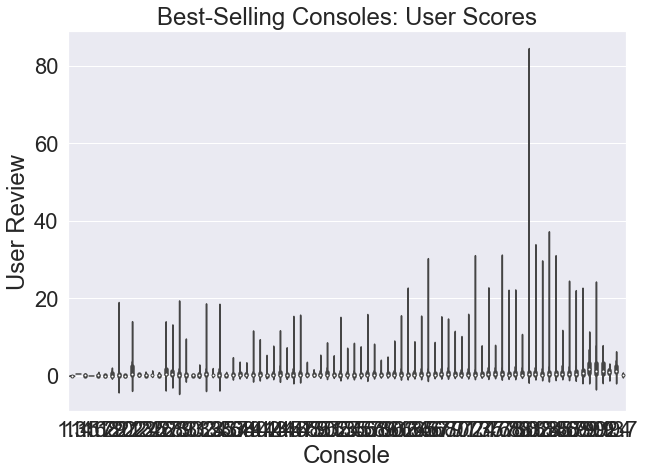

In [141]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
ax = sns.violinplot(x=df['user_review'], y=df['Global_Sales'], data=df)
ax.set(xlabel='Console', ylabel='User Review', title='Best-Selling Consoles: User Scores')
plt.show()

## <a name='Ques' > Questions & Insights </a>